In [36]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d

In [3]:
dataset=pd.read_csv("credit.csv")

In [4]:
dataset.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [10]:
dataset.drop(columns=["CUST_ID"],inplace=True)

In [7]:
dataset.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [11]:
# Check missing values count per column
print(dataset.isnull().sum())

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [14]:
dataset["MINIMUM_PAYMENTS"] = dataset["MINIMUM_PAYMENTS"].fillna(dataset["MINIMUM_PAYMENTS"].mean())
dataset["CREDIT_LIMIT"] = dataset["CREDIT_LIMIT"].fillna(dataset["CREDIT_LIMIT"].mean())

In [15]:
# Check missing values count per column
print(dataset.isnull().sum())


BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64


In [41]:
kmeans = KMeans(n_clusters=14, random_state=42)
y_kmeans = kmeans.fit_predict(dataset)

In [32]:
# Step 3: Add cluster labels to data
dataset['Cluster'] = y_kmeans

In [20]:
dataset['Cluster'] 

0       1
1       0
2       0
3       0
4       1
       ..
8945    1
8946    1
8947    1
8948    1
8949    1
Name: Cluster, Length: 8950, dtype: int32

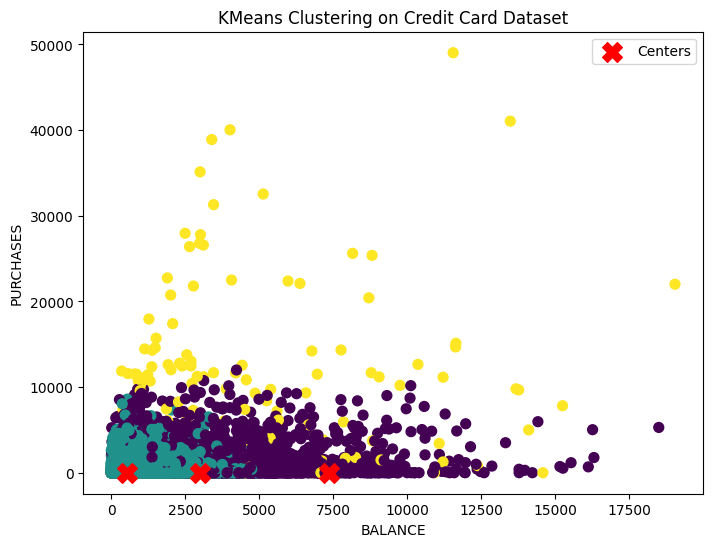

In [47]:

# Step 4: Visualize clusters using 2D (first two features)
plt.figure(figsize=(8,6))
plt.scatter(dataset.iloc[:,0], dataset.iloc[:,2], c=dataset['Cluster'], cmap='viridis', s=50)

# Plot cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label="Centers")

plt.xlabel(dataset.columns[0])
plt.ylabel(dataset.columns[2])
plt.title("KMeans Clustering on Credit Card Dataset")
plt.legend()
plt.show()

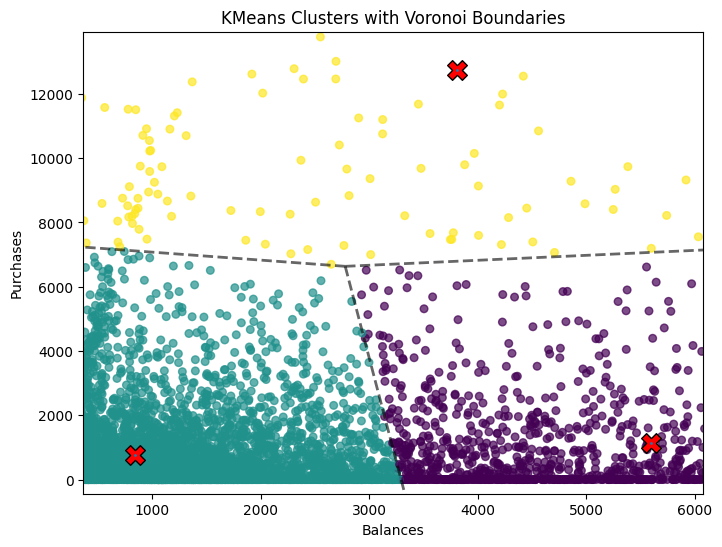

In [64]:
# Take only first 2 columns for visualization
X_2d = dataset[["BALANCE", "PURCHASES"]].values

# Fit KMeans again on 2D data
kmeans = KMeans(n_clusters=3, random_state=42)
y_kmeans = kmeans.fit_predict(X_2d)
centers = kmeans.cluster_centers_

# Plot scatter
plt.figure(figsize=(8,6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_kmeans, cmap="viridis", s=30, alpha=0.7)

# Add Voronoi polygons
vor = Voronoi(centers)
voronoi_plot_2d(vor, ax=plt.gca(), show_vertices=False, line_colors='black', line_width=2, line_alpha=0.6, point_size=2)

# Plot cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c="red", s=200, marker="X", edgecolors="black")

plt.xlabel("Balances")
plt.ylabel("Purchases")
plt.title("KMeans Clusters with Voronoi Boundaries")
plt.show()

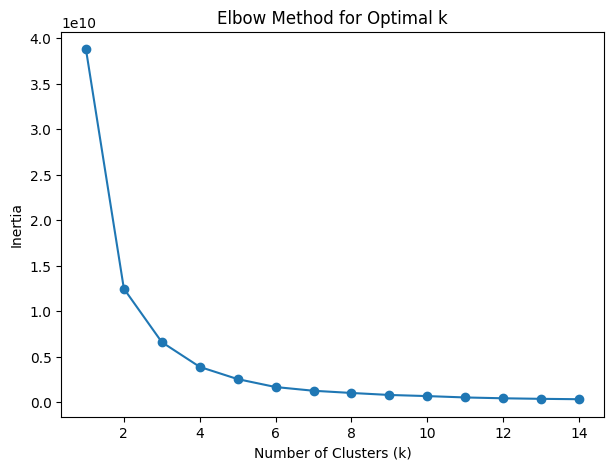

In [44]:
inertia = []
for k in range(1, 15):
    km = KMeans(n_clusters=k, random_state=42).fit(X_2d)
    inertia.append(km.inertia_)

plt.figure(figsize=(7,5))
plt.plot(range(1, 15), inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()


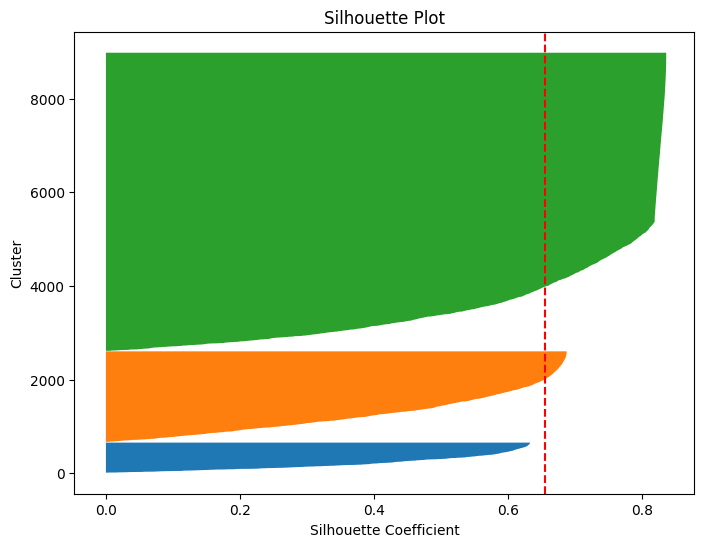

In [45]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

silhouette_avg = silhouette_score(X_2d, y_kmeans)
sample_silhouette_values = silhouette_samples(X_2d, y_kmeans)

plt.figure(figsize=(8,6))
y_lower = 10
for i in range(kmeans.n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[y_kmeans == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values)
    y_lower = y_upper + 10
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.xlabel("Silhouette Coefficient")
plt.ylabel("Cluster")
plt.title("Silhouette Plot")
plt.show()


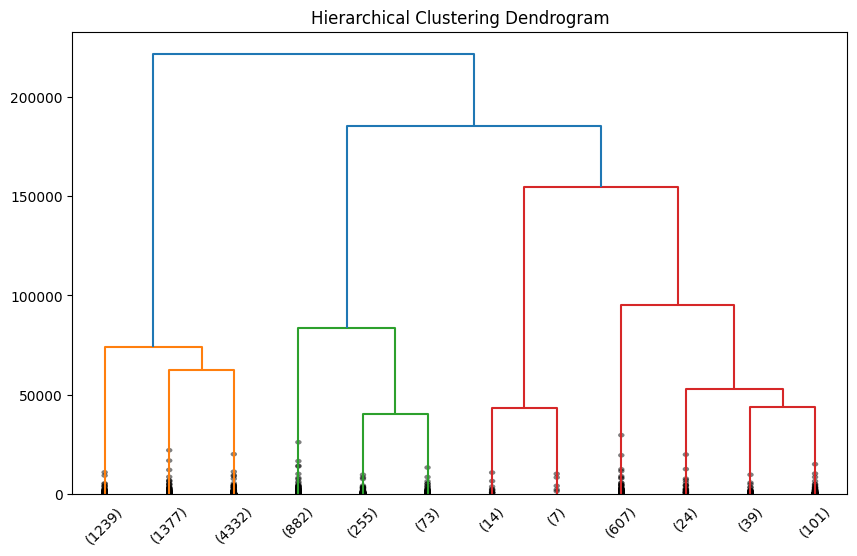

In [56]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X_2d, 'ward')
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode="lastp", p=12, leaf_rotation=45, leaf_font_size=10, show_contracted=True)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()


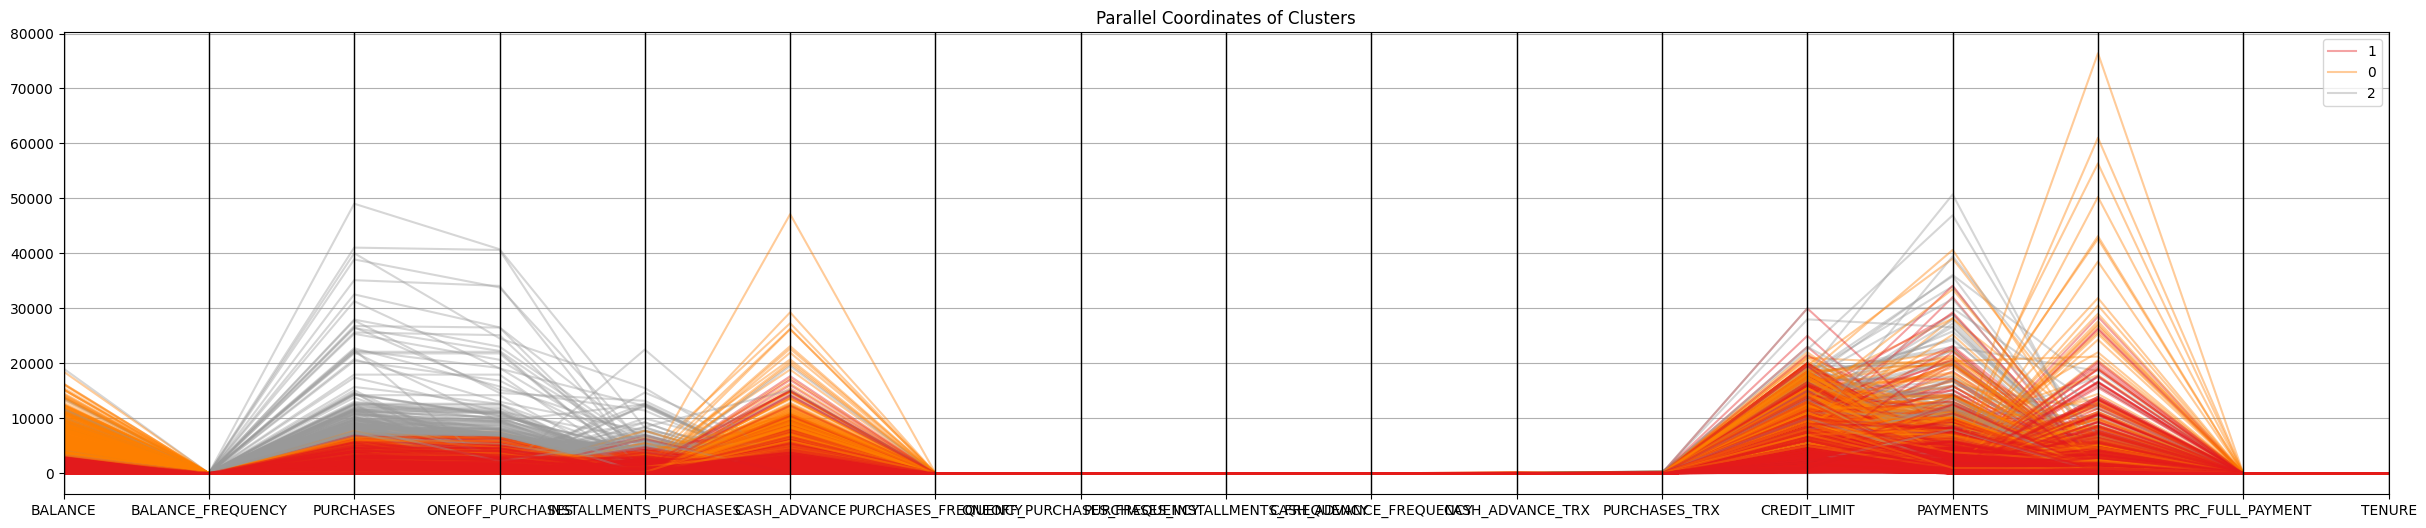

In [59]:
from pandas.plotting import parallel_coordinates

X_temp = dataset.copy()
X_temp["Cluster"] = y_kmeans

plt.figure(figsize=(30,6))
parallel_coordinates(X_temp, "Cluster", colormap=plt.cm.Set1, alpha=0.4)
plt.title("Parallel Coordinates of Clusters")
plt.show()


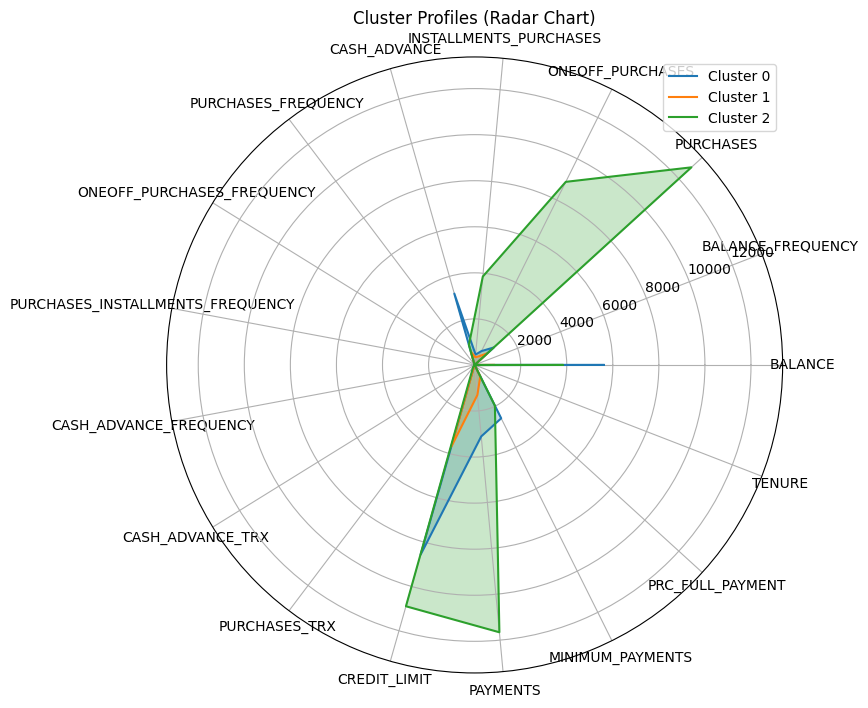

In [60]:
import numpy as np

cluster_means = X_temp.groupby("Cluster").mean()

labels = list(cluster_means.columns)
num_vars = len(labels)

angles = np.linspace(0, 2*np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # loop back

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for i, row in cluster_means.iterrows():
    values = row.tolist()
    values += values[:1]
    ax.plot(angles, values, label=f"Cluster {i}")
    ax.fill(angles, values, alpha=0.25)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_title("Cluster Profiles (Radar Chart)")
ax.legend()
plt.show()


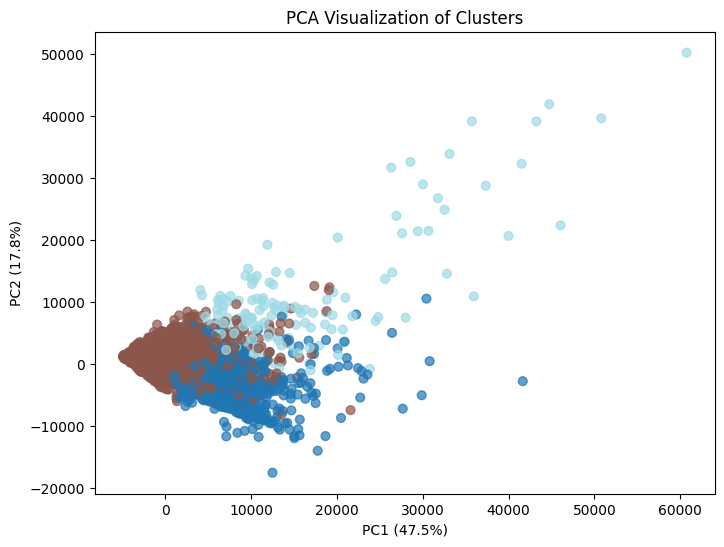

In [63]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(dataset.drop(columns=["Cluster"]))

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_kmeans, cmap="tab20", s=40, alpha=0.7)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.title("PCA Visualization of Clusters")
plt.show()
